## 模型解析
模型来源：https://github.com/digital-standard/ThreeDPoseUnityBarracuda

解析ONNX模型的库：https://github.com/microsoft/onnxruntime#compatibility

python API:https://microsoft.github.io/onnxruntime/python/api_summary.html

In [1]:
import numpy as np
import onnxruntime as rt
import cv2
import matplotlib.pyplot as plt

In [2]:
sess = rt.InferenceSession("Resnet34_3inputs_448x448_20200609.onnx")

In [3]:
inputs = sess.get_inputs()

## 读取图像

(1, 3, 448, 448)

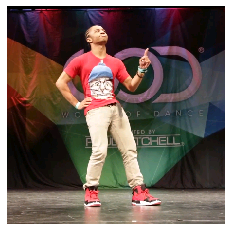

In [4]:
img = np.loadtxt("./unity_data/input100.txt")
img = img.reshape((448,448,3))
img = img.astype(np.float32)

plt.imshow(img)
plt.axis('off')

img = img.transpose(2,1,0)
img = img[np.newaxis,...]
img.shape

In [5]:
pred_onx = sess.run(None,{
    inputs[0].name:img,
    inputs[1].name:img,
    inputs[2].name:img
})

## 解析unity输出
对于heatmap：24个关节，每个关节有28个特征图，每个特征图的维度是$(28,28)$

对于offset3D：比heatmap多3倍，因为每个关节对应xyz三个坐标的偏移

注意heatmap的$24*28=672$个特征图分别代表的顺序是第1个关节的第1个特征图、第1个关节的第2个特征图、第1个关节的第3个特征图......第i个关节的第j个特征图，第i个关节的第j+1个特征图.......第24个关节的第28个特征图

注意offset的$24*28*3=2016$个特征图分别代表的顺序是第1个关节的第1个特征图对应的x偏移量，第1个关节第2个特征图对应的x偏移量......第1个关节的第28个特征图对应的偏移量，第2个关节的第1个特征图对应的x偏移量，.......，第24个关节的第28个特征图对应的x偏移量，第1个关节的第1个特征图对应的y偏移量........

In [6]:
heatMap3D = np.loadtxt('./unity_data/heatmap100.txt')
offset3D = np.loadtxt('./unity_data/offset100.txt')
heatMap3D = heatMap3D.reshape((28,28,672))
offset3D = offset3D.reshape((28,28,2016))

In [7]:
for j in range(0,24):
    # 找到第j个关节的28个特征图，并找到最大值的索引
    joint_heat = heatMap3D[...,j*28:(j+1)*28]
    [x,y,z] = np.where(joint_heat==np.max(joint_heat))
    x=int(x[-1])
    y=int(y[-1])
    z=int(z[-1])
    #通过heatmap的索引找到对应的offset图，并计算3D坐标的xyz值
    pos_x = offset3D[x,y,j*28+z] + y
    pos_y = offset3D[x,y,24*28+j*28+z] + x
    pos_z = offset3D[x,y,24*28*2+j*28+z] + z - 14
    print("%f,%f,%f;" %(pos_x,pos_y,pos_z))

8.944561,7.026363,-1.737533;
6.815941,9.742403,-1.928353;
9.167175,12.049628,-3.255923;
10.030625,11.907913,-3.490909;
9.890021,12.350770,-3.917167;
13.272560,6.667956,-0.653380;
15.699018,9.528410,-0.509300;
16.362666,8.295240,-3.037846;
16.027151,7.816952,-3.721577;
16.339278,7.872930,-4.114751;
11.841399,4.007525,-1.029714;
11.843168,3.532963,-1.974366;
10.234497,4.315905,-2.040803;
11.223990,3.657503,-2.365694;
11.758668,3.960306,-2.825614;
11.185020,13.059720,-1.176617;
11.383541,18.007339,-2.236977;
10.508614,23.091063,-1.299181;
10.679365,23.964089,-2.779460;
13.481118,12.599173,0.111821;
15.206530,17.745500,-1.155244;
16.006708,22.161436,-3.859284;
16.613978,22.441440,-4.821717;
11.769417,11.426584,-0.493806;
